## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy.random import randint
from multiprocessing import cpu_count
import os
import warnings
warnings.filterwarnings('ignore')
import math

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline #pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE #for feature selection
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import (f1_score,classification_report,
                             roc_auc_score,confusion_matrix,roc_curve,auc) # evaluatin metrics
from sklearn.model_selection import KFold,RandomizedSearchCV ,cross_val_score,RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import gc

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio

from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p
from scipy.stats import yeojohnson, boxcox

#Subplots
from plotly.subplots import make_subplots
from matplotlib.ticker import MaxNLocator

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Reading the Data

* The "Id" column seems useless so we will drop them imediately.

In [ ]:
# Reading the Data and setting the "Id" column as the index.

data = pd.read_csv("/content/drive/MyDrive/Nova Ims/Machine Learning for Finance/House Data/data.csv")

data.drop(columns = "Id", inplace = True)

data.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   
5          50       RL         85.0    14115   Pave   NaN      IR1   
6          20       RL         75.0    10084   Pave   NaN      Reg   
7          60       RL          NaN    10382   Pave   NaN      IR1   
8          50       RM         51.0     6120   Pave   NaN      Reg   
9         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9         0.0        TA        TA     BrkTil       T

## Corpus Split

* In order to eliminate any leakage from the test set, the first step is to split the data.
* Following this thought, keep in mind that all transformations executed in this notebook, are fitted in the training set and then applied in the test set to prevent the models to learn from the test data!

In [ ]:
# Corpus Split

df_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42)

print("Shape of Training Data:", df_train.shape)
print("Shape of Training Data:", df_test.shape)

Shape of Training Data: (1168, 80)
Shape of Training Data: (292, 80)


## Exploratory Data Analysis (EDA)

### General Analysis

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt  

* We have three different data types:
  1. float
  2. integer
  3. object

* 38 numerical features
* 43 Categorical features

In [ ]:
# Checking for the number of unique values for each variable to see if some of these features should have a different type

df_train.nunique()

MSSubClass        15
MSZoning           5
LotFrontage      107
LotArea          890
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        111
YearRemodAdd      61
RoofStyle          6
RoofMatl           7
Exterior1st       15
Exterior2nd       16
MasVnrType         3
MasVnrArea       286
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       549
BsmtFinType2       6
BsmtFinSF2       118
BsmtUnfSF        685
TotalBsmtSF      630
Heating            6
HeatingQC          5
CentralAir         2
Electrical         4
1stFlrSF         657
2ndFlrSF         361
LowQualFinSF      20
GrLivArea        734
BsmtFullBath       4
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr       8
KitchenAbvGr       4
KitchenQual        4
TotRmsAbvGrd      12
Functional         7
Fireplaces         4
FireplaceQu        5
GarageType         6
GarageYrBlt       94
GarageFinish       3
GarageCars         5
GarageArea       394
GarageQual         5
GarageCond         5
PavedDrive         3
WoodDeckSF       244
OpenPorchSF      188
EnclosedPorch     98
3SsnPorch         17
ScreenPorch       66
PoolArea           7
PoolQC             3
Fence              4
MiscFeature        4
MiscVal           19
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
SalePrice        571
dtype: int64

### Overall statistics for numerical variables

In [ ]:
# Numerical Features

df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000   951.000000    1168.000000  1168.000000  1168.000000   
mean     56.849315    70.343849   10689.642123     6.121575     5.584760   
std      42.531862    24.897021   10759.366198     1.367619     1.116062   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7587.250000     5.000000     5.000000   
50%      50.000000    70.000000    9600.000000     6.000000     5.000000   
75%      70.000000    80.000000   11700.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1162.000000  1168.000000  1168.000000   
mean   1970.965753   1984.897260   103.771945   446.023973    45.152397   
std      30.675495     20.733955   173.032238   459.070977   158.217499   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1994.000000     0.000000   384.500000     0.000000   
75%    2001.000000   2004.000000   166.000000   721.000000     0.000000   
max    2010.000000   2010.000000  1378.000000  5644.000000  1127.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    570.595034  1061.771404  1169.354452   352.351027      5.696062   
std     446.364551   440.676330   386.675268   439.570872     47.887106   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     222.500000   796.000000   888.000000     0.000000      0.000000   
50%     480.000000   997.500000  1095.000000     0.000000      0.000000   
75%     810.250000  1299.250000  1396.750000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1527.401541      0.425514      0.057363     1.577055     0.381849   
std     524.432686      0.519969      0.236289     0.546912     0.499953   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1145.750000      0.000000      0.000000     1.000000     0.000000   
50%    1473.000000      0.000000      0.000000     2.000000     0.000000   
75%    1792.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1104.000000   
mean       2.890411      1.047945      6.561644     0.618151  1978.662138   
std        0.804855      0.225448      1.619706     0.645129    24.728938   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.750000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.781678   476.273973    95.946918    49.578767      21.839041   
std       0.740161   211.095373   129.685939    69.433580      62.083227   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   341.000000     0.000000     0.000000       0.000000   
50%       2.000000   482.000000     0.000000    27.000000       0.000000   
75%       2.000000   576.000000   168.000000    74.000000   

In [ ]:
# Categorical Features

df_train.describe(include=['object'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1168   1168    74     1168        1168      1168      1168   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        924   1164    44      729        1059      1167       822   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1168         1168       1168       1168     1168       1168   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1108          181       1004       1157      978        577   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1168     1168        1168        1168        485      1168   
unique         6        7          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq         906     1149         420         410        366       727   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1168       1168     1140     1140         1140         1140   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1018        520      521     1045          769          345   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1140    1168      1168       1168       1167        1168   
unique            6       6         5          2          4           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1009    1140       583       1085       1071         589   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1168         621       1104         1104       1104       1104   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1084         305        693          480       1050       1061   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1168      6    233          46     1168          1168  
unique          3      3      4           4        9             6  
top             Y     Fa  MnPrv        Shed       WD        Normal  
freq         1070      2    128          41     1012           964

### Checking for Missing Values

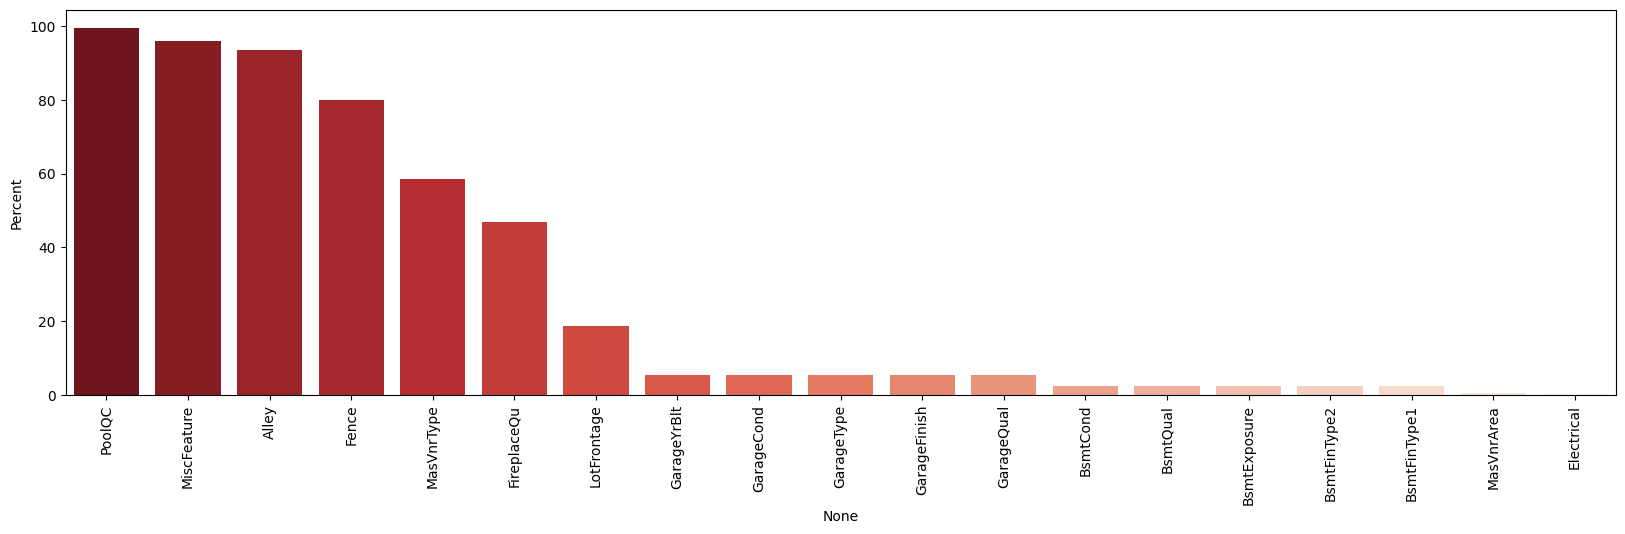

In [ ]:
# Function to return missing ratios

def missing_percentage(df):

    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Checking for Null Values in the training data

missing = missing_percentage(df_train)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

* As we can see, there are quit a lot missing values in our features!
* We will need to fix this missing data down the line. Also, there are some features that might need to be dropped (PoolQC, MiscFeature, etc...) due to their huge amount of missing values, meaning that they do not bring any value to the prediction.

### Target Variable

In [ ]:
# Overall check of the target variable

df_train["SalePrice"].describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [ ]:
# Generating KDE values manually

sale_price = df_train['SalePrice']
kde = stats.gaussian_kde(sale_price, bw_method=0.5)
x_kde = np.linspace(min(sale_price), max(sale_price), 1000)
y_kde = kde(x_kde)

# Creating a figure with 2 subplots (Histogram & KDE, Box Plot)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Histogram & KDE of Sale Price", "Box Plot of Sale Price"],
    specs=[[{"secondary_y": True}, {"secondary_y": False}]]
)

# Adding histogram with improved aesthetics

fig.add_trace(go.Histogram(
    x=sale_price,
    nbinsx=60,
    marker=dict(color="steelblue", line=dict(color="black", width=1)),
    opacity=0.6,
    name="Histogram"
), row=1, col=1, secondary_y=False)

# Adding the KDE curve on secondary y-axis

fig.add_trace(go.Scatter(
    x=x_kde, y=y_kde,
    mode='lines',
    line=dict(color='red', width=2),
    name="KDE Curve"
), row=1, col=1, secondary_y=True)

# Assing the boxplot

fig.add_trace(go.Box(
    y=sale_price,
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8,
    marker=dict(color="orange", size=5, opacity=0.6),
    line=dict(color="darkorange"),
    name="Box Plot"
), row=1, col=2)

fig.update_layout(
    height=500, width=1600,
    title_text="Sale Price Distribution Analysis",
    title_x=0.5,
    showlegend=True,
    legend=dict(x=0.75, y=1.15, orientation="h"),
    template="plotly_white",
    font=dict(size=14)
)

fig.update_xaxes(title_text="Sale Price", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text="Density", row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text="Sale Price", row=1, col=2)

fig.show()

* The distribution of house prices is right-skewed. Most houses are concentrated in the 100k-250k price range.
* There are some high-value houses (above 500k-700k) but these are outliers.
* The box plot confirms the right-skewed distribution, with the median sale price (165k) positioned closer to the lower quartile.
* the wiskers show that most houses fall within the lower to mid-price range.

### Feature Analysis

In [ ]:
target = ["SalePrice"]

date_features = ['YearBuilt','YearRemodAdd', 'GarageYrBlt']  # "MoSold" and "YrSold" are analyzed as discrete dispite being date features

print("Date Features: ", date_features)

# Identifying discrete features out of the numerical ones

discrete_features=[]

for col in df_train.columns:
    if df_train[col].dtype=='int64' and len(df_train[col].unique()) <=15:
        discrete_features.append(col)

print("Discrete Features: ", discrete_features)

# Identifying continuous features

continuous_features = []

for col in df_train.columns:
    if df_train[col].dtype in ('int64', 'float64') and col not in (date_features + target + ['MoSold', 'YrSold']) and col not in discrete_features:
        continuous_features.append(col)

print("Continuous Features: ", continuous_features)

# Identifying categorical features

categorical_features = []

for col in df_train.columns:
    if df_train[col].dtype == "object":
        categorical_features.append(col)

print("Categorical Features: ", categorical_features)

total_cols = target + date_features + discrete_features + continuous_features + categorical_features

Date Features:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
Discrete Features:  ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
Continuous Features:  ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
Categorical Features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 

* Extracting the discrete features from the data in order to analyze them as categorical ones;

#### Discrete Numerical Analysis

In [ ]:
# Checking the unique values for these columns

for col in discrete_features:
    print("{} has {} unique values.".format(col,df_train[col].unique()))

MSSubClass has [ 20  60  30  50  85  80  45  90 160  40 190  75 120  70 180] unique values.
OverallQual has [ 5  6  4  8  7  3 10  9  1  2] unique values.
OverallCond has [6 7 5 8 4 9 3 2 1] unique values.
BsmtFullBath has [1 0 2 3] unique values.
BsmtHalfBath has [0 1 2] unique values.
FullBath has [1 2 0 3] unique values.
HalfBath has [0 1 2] unique values.
BedroomAbvGr has [3 2 4 6 5 0 1 8] unique values.
KitchenAbvGr has [1 2 3 0] unique values.
TotRmsAbvGrd has [ 5  7  4  6  8 12 10  9  3 11  2 14] unique values.
Fireplaces has [0 1 2 3] unique values.
GarageCars has [1 2 0 4 3] unique values.
PoolArea has [  0 648 555 480 512 519 738] unique values.
MoSold has [ 6  5  7  3  4 10 12 11  8  9  2  1] unique values.
YrSold has [2010 2009 2008 2007 2006] unique values.


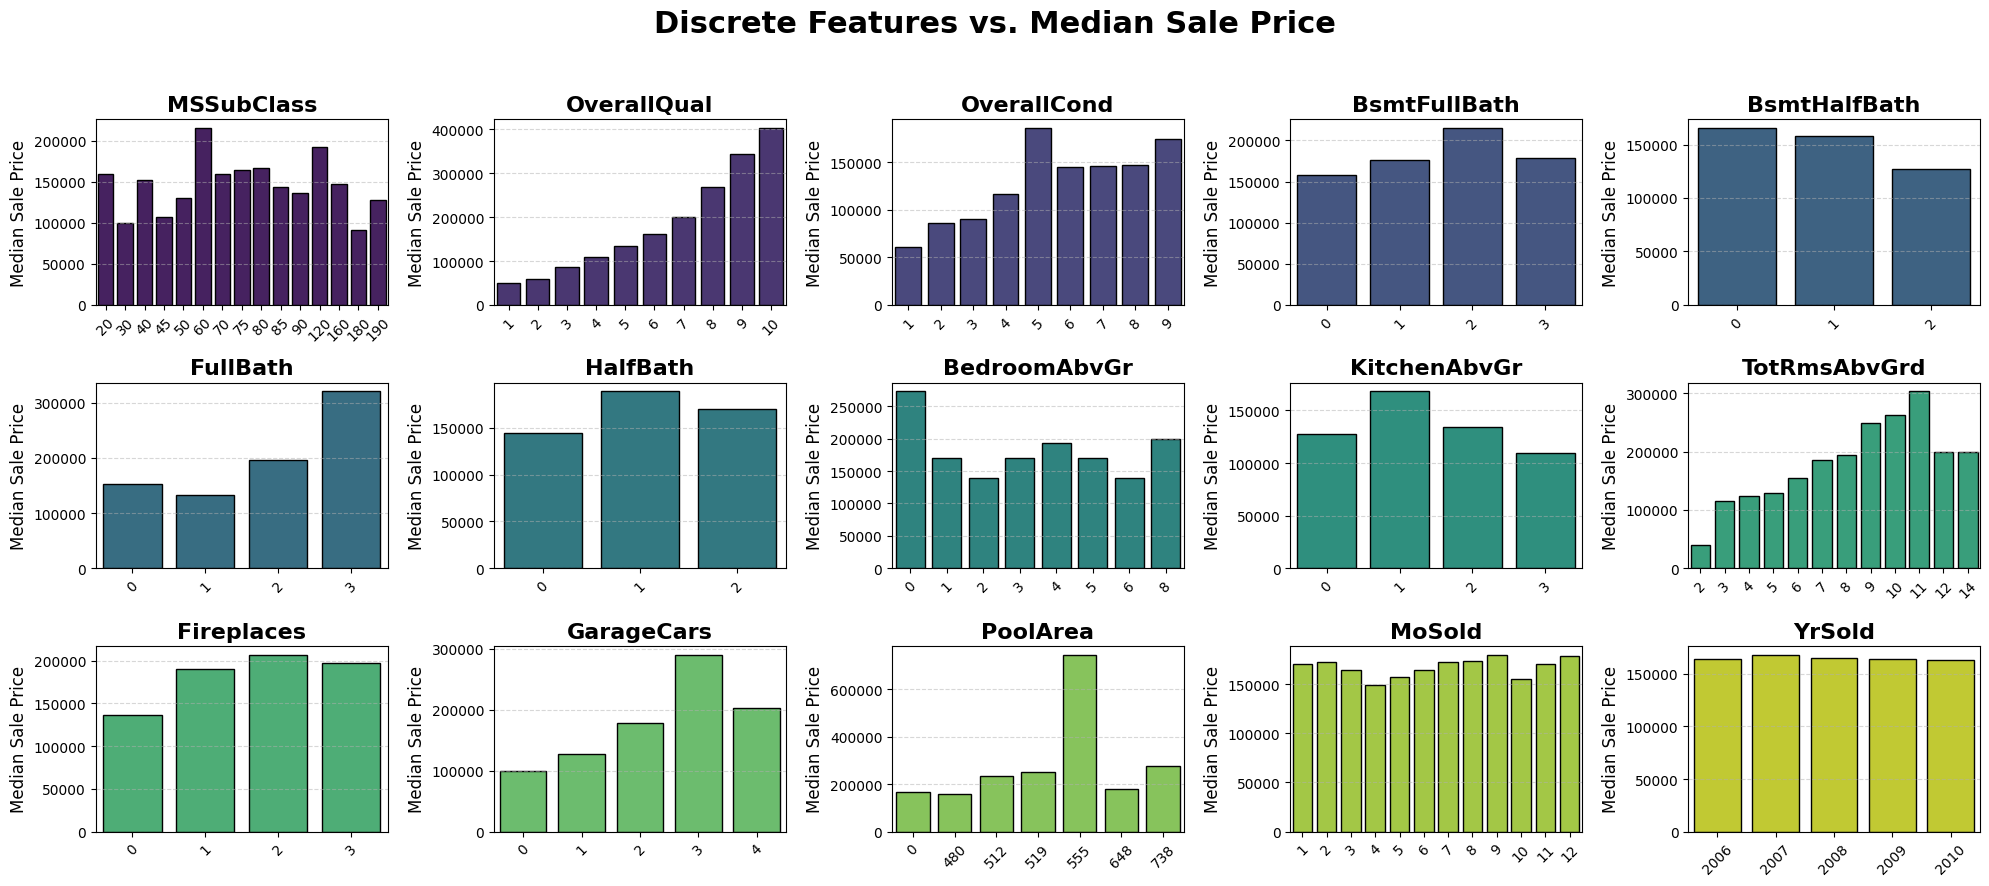

In [ ]:
import math

# Define the number of discrete features
num_features = len(discrete_features)

# Determine subplot layout dynamically
cols = 5  # Set number of columns
rows = math.ceil(num_features / cols)  # Calculate rows based on features

# Configure figure dimensions dynamically
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
fig.suptitle("Discrete Features vs. Median Sale Price", fontsize=22, fontweight='bold')

# Define color palette
palette = sns.color_palette("viridis", num_features)

# Loop through discrete features and create bar plots
for i, feature in enumerate(discrete_features):
    row, col = i // cols, i % cols
    ax = axes[row, col]

    # Compute the median sale price for each category
    sorted_medians = df_train.groupby(feature)['SalePrice'].median().sort_values(ascending=False)

    # Create barplot
    sns.barplot(
        x=sorted_medians.index,
        y=sorted_medians.values,
        ax=ax,
        palette=[palette[i]],
        edgecolor="black"
    )

    # Customize subplot
    ax.set_title(feature, fontsize=16, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Median Sale Price", fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
    ax.grid(axis="y", linestyle="--", alpha=0.5)

# Hide empty subplots if the number of features is less than available slots
for i in range(num_features, rows * cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

* TotRmsAbvGrd (Toal rooms above ground): As the total number of rooms increases, median price of the house increase until 11 rooms, after which it sees a decrease in price.
* BeedroomAbvGr (Beedroom above ground): The sale price is the highest for 0 bedrroms.
* Fireplaces: As the number of fireplaces increase, house price should also increase.
* PoolArea: 555 sq feet seems to be associated with highest sale price. As the area increases, price should increase as well.

#### Continuous Numerical Analysis

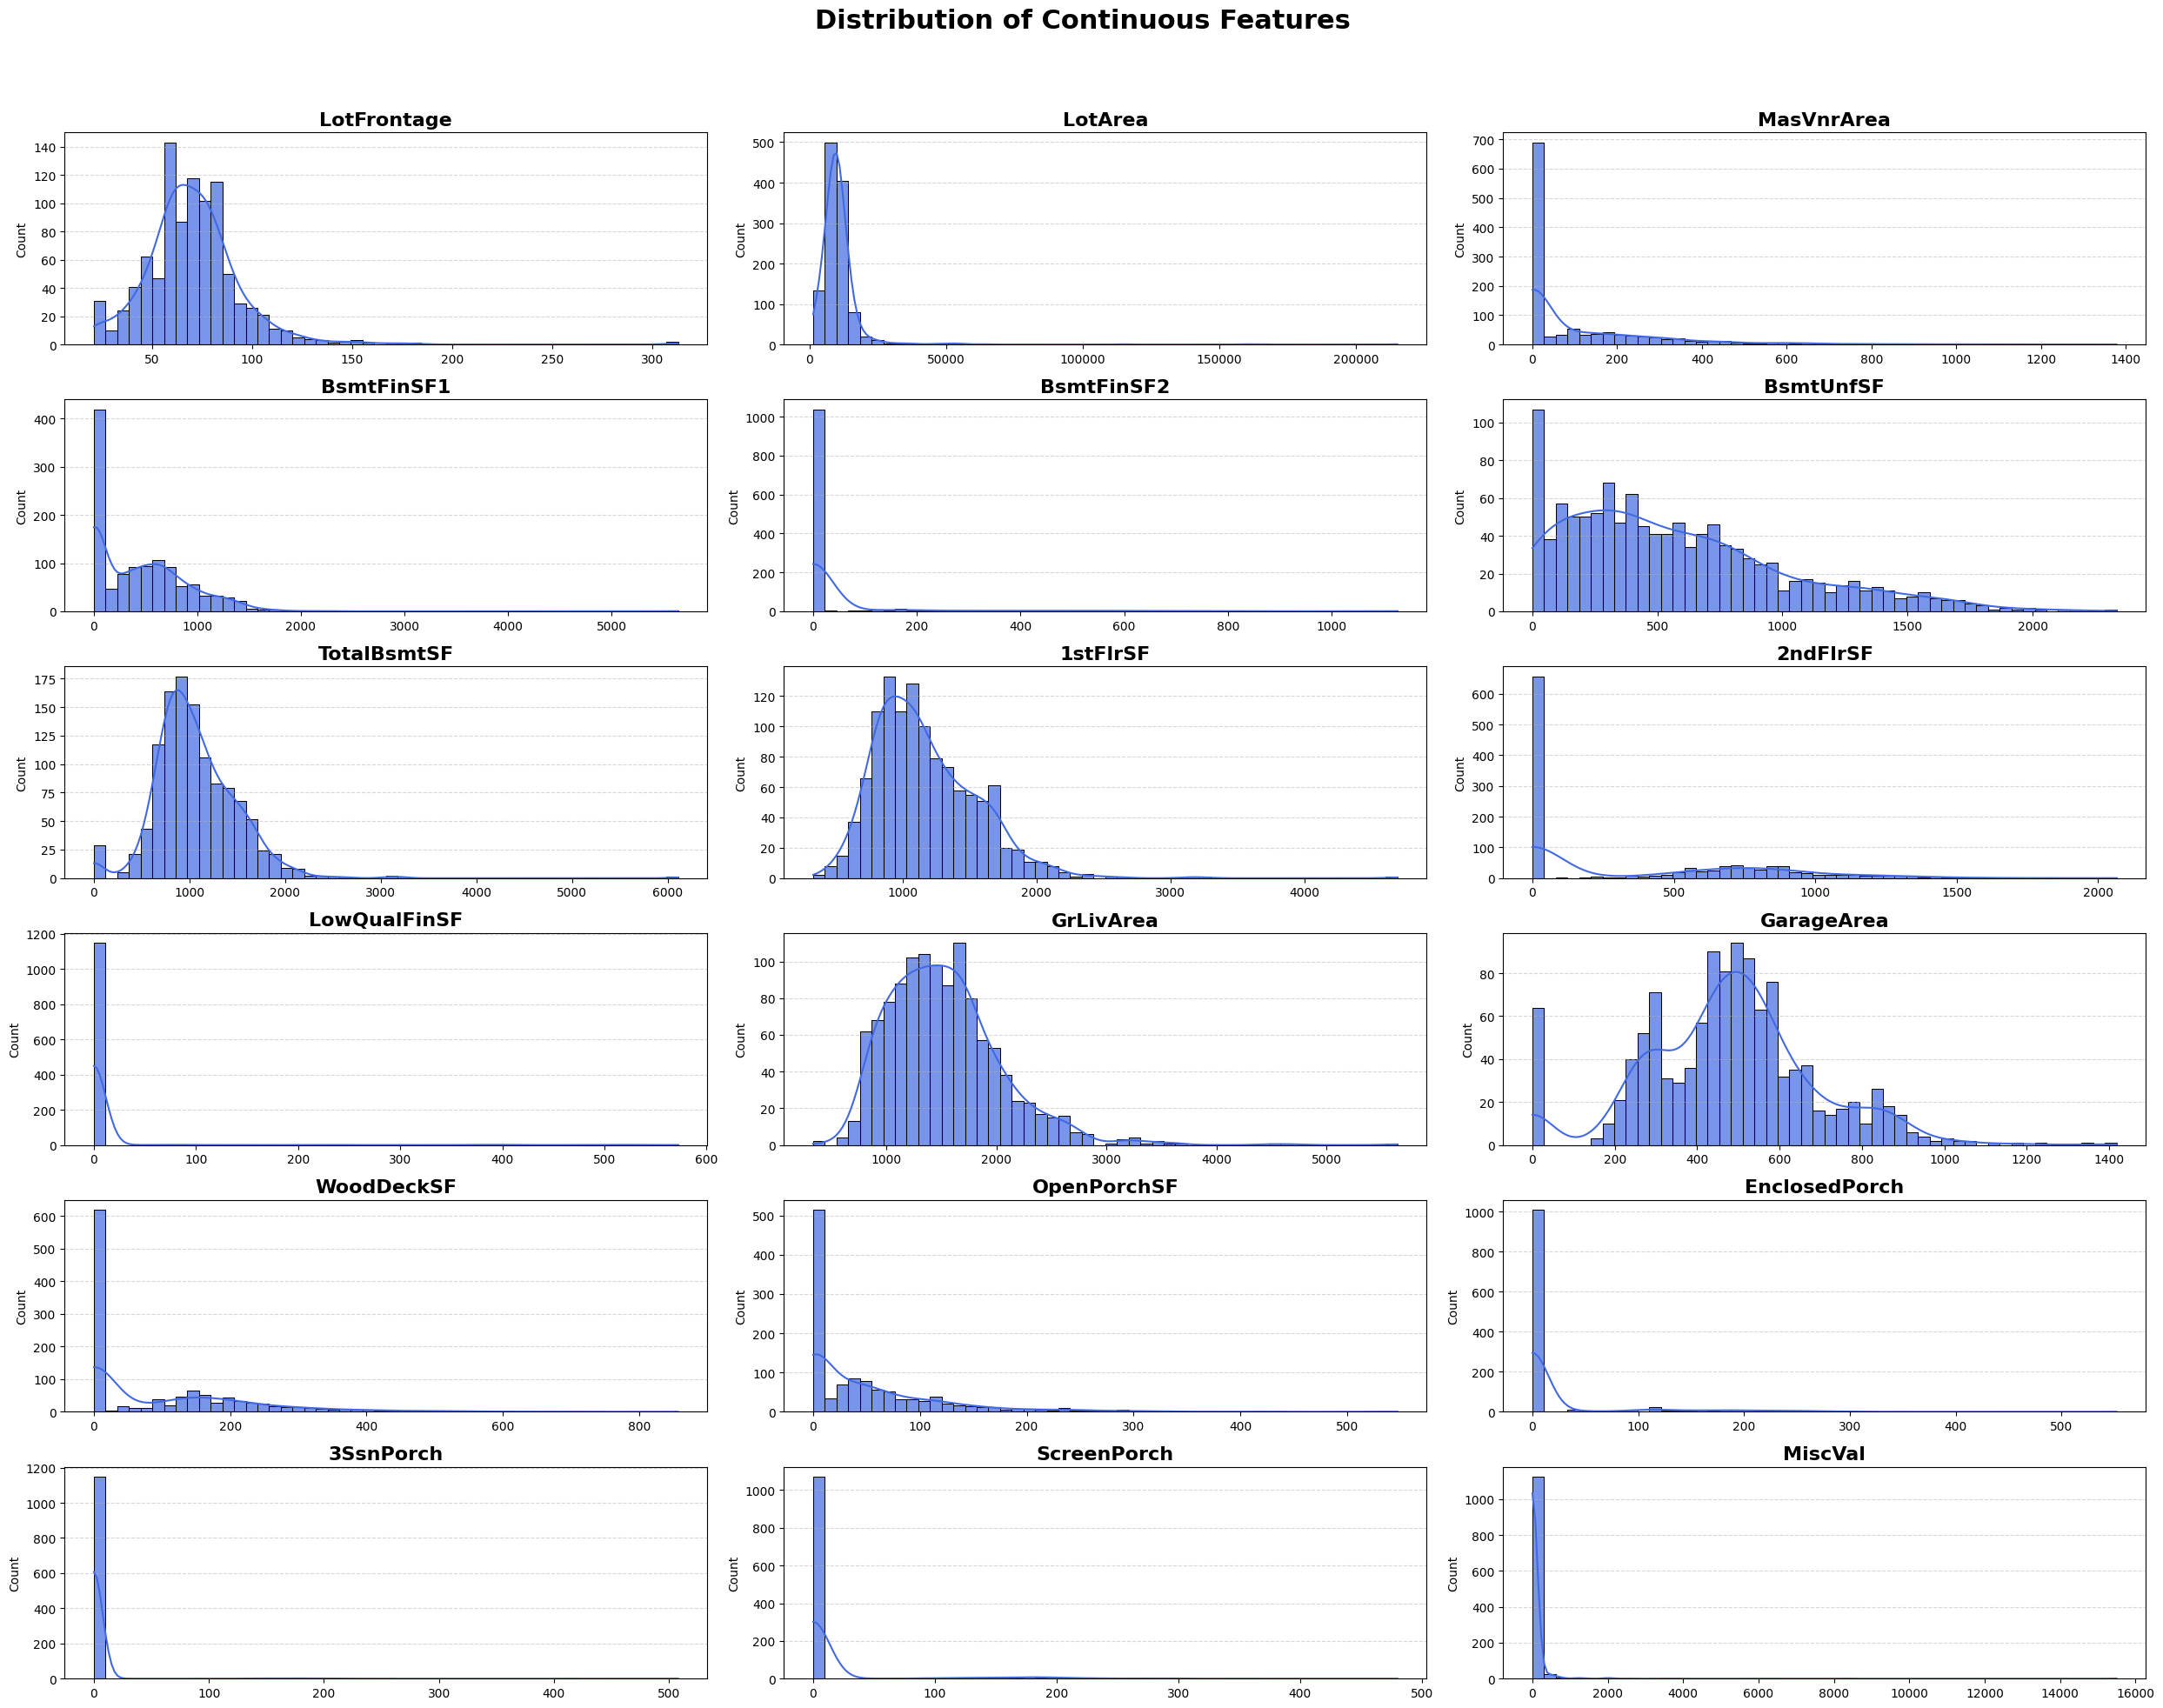

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 20))
fig.suptitle("Distribution of Continuous Features", fontsize=22, fontweight='bold')

axes = axes.flatten()

# Looping through each continuous feature

for i, feature in enumerate(continuous_features):
    sns.histplot(df_train[feature], bins=50, kde=True, ax=axes[i], color="royalblue", alpha=0.7)
    axes[i].set_title(feature, fontsize=16, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

* Most continuous features exhibit right-skewed distributions, meaning most values are concentrated at the lower end while a few extreme values create a long tail.
* It might be interesting to use log transformation on these feature to make them normally distributed.

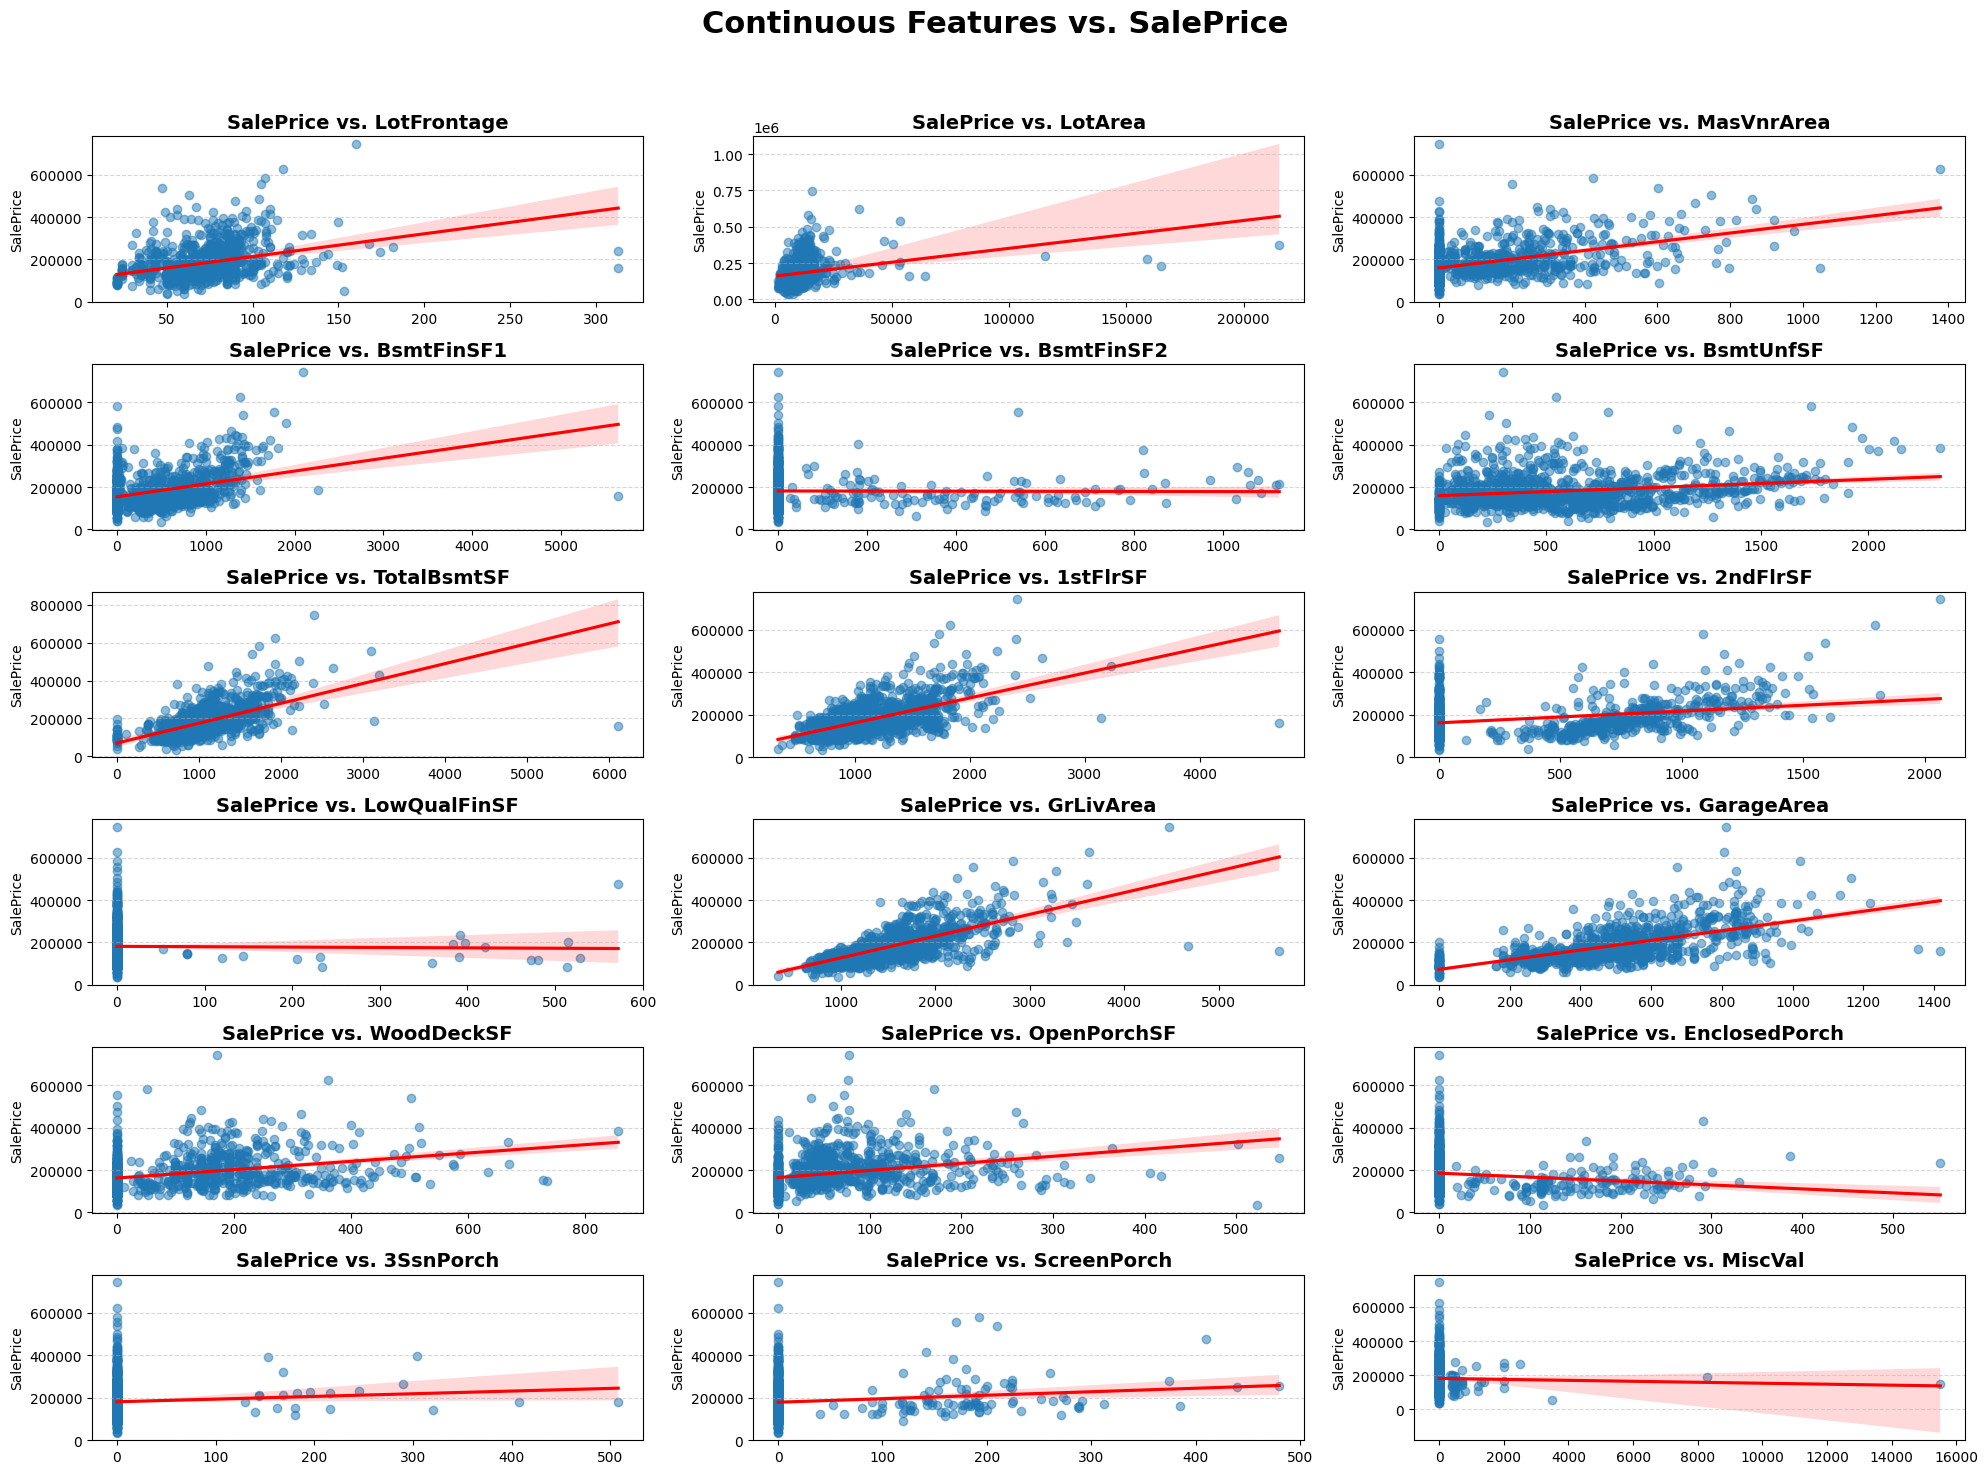

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 15))
fig.suptitle("Continuous Features vs. SalePrice", fontsize=22, fontweight='bold')

axes = axes.flatten()

# Creating Scatter plots with regression lines

for i, feature in enumerate(continuous_features):
    sns.regplot(x=df_train[feature], y=df_train['SalePrice'], ax=axes[i],
                scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    axes[i].set_title(f"SalePrice vs. {feature}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Some of these features show some strong positive correlation!

* TotalBsmtSF: Houses with larger basements tend to have higher prices.
* 1stFlrSF: First-floor square footage is a major driver of house prices.
* GrLivArea: It's one of the strongest correlations because larger living areas lead to higher prices.
* GarageArea: Bigger garages tend to increase home value.

#### Categorical Analysis

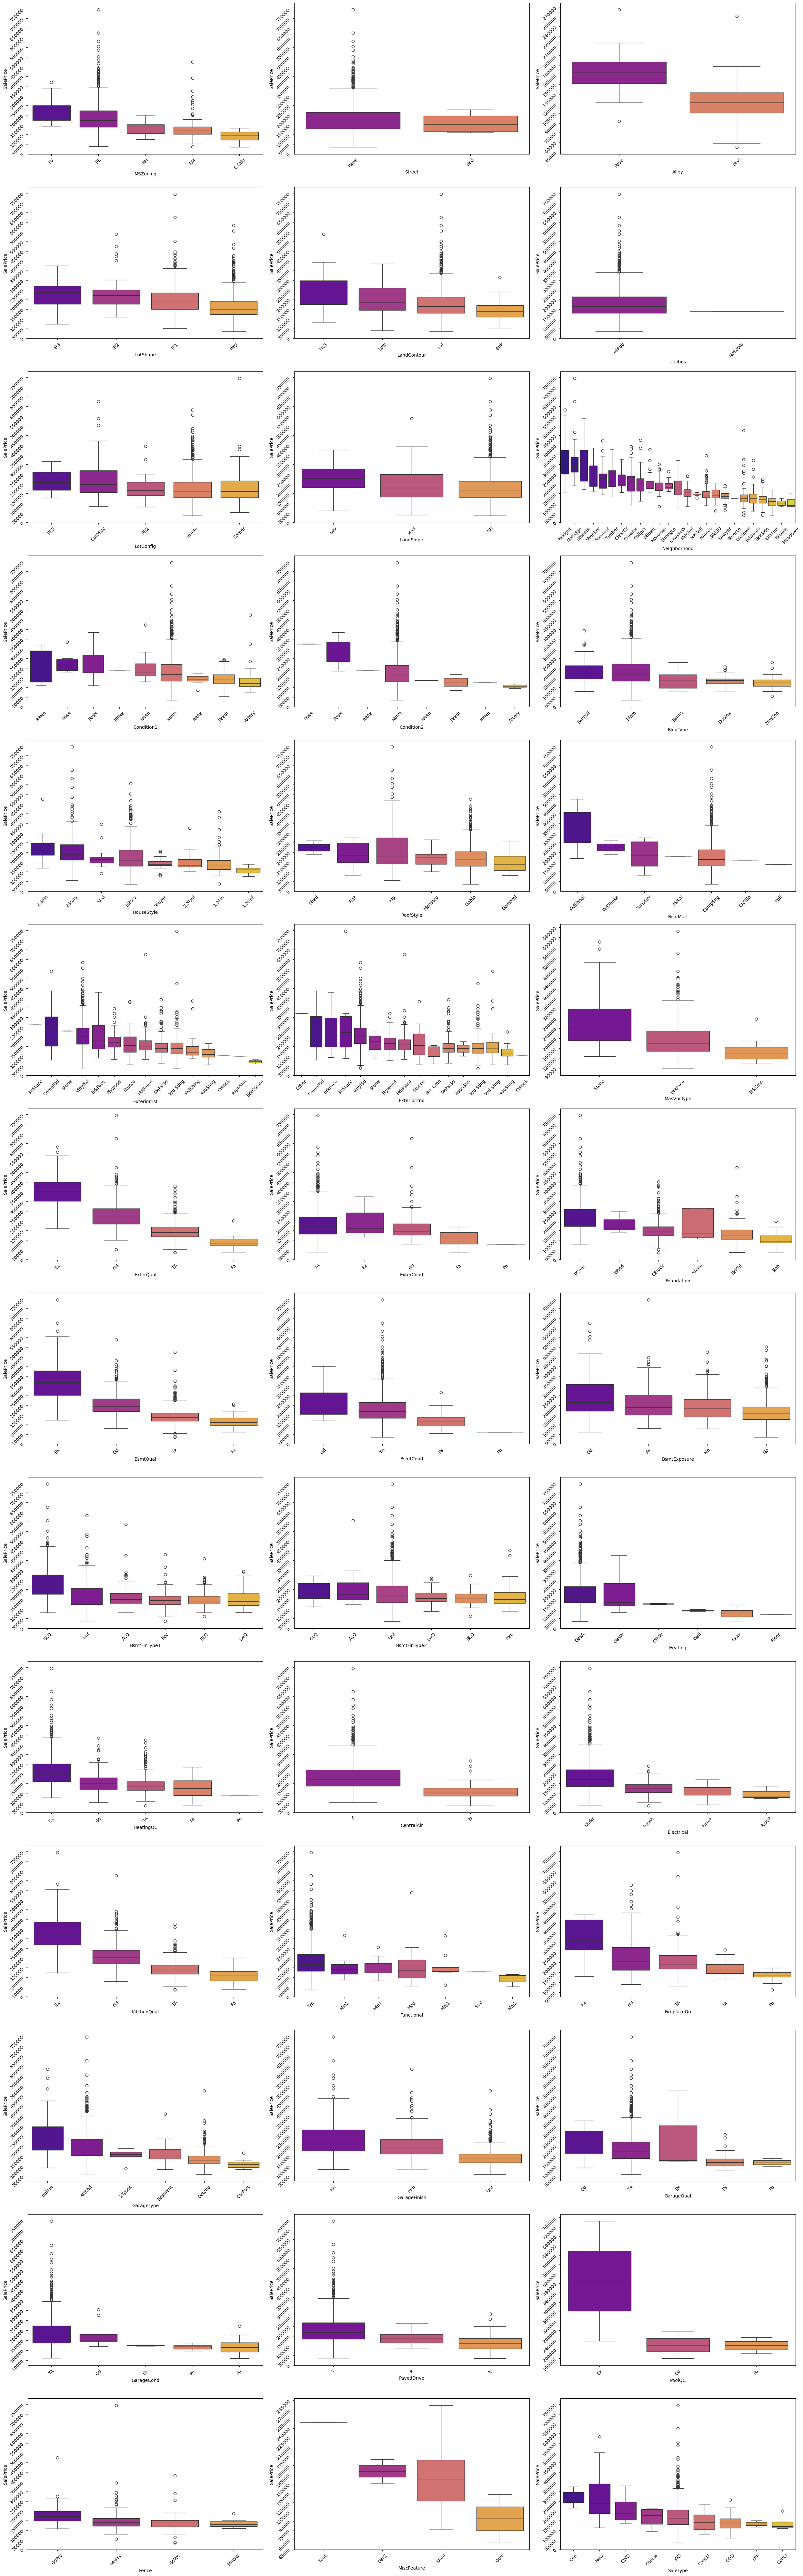

In [ ]:
# Boxplots for categorical features in order to assess their relationship with the target variable

def srt_box(y, df):

  fig, axes = plt.subplots(14, 3, figsize=(25, 80))
  axes = axes.flatten()

  for i, j in zip(categorical_features, axes):

      sortd = df.groupby([i])[y].median().sort_values(ascending=False)
      sns.boxplot(x=i,
                  y=y,
                  data=df,
                  palette='plasma',
                  order=sortd.index,
                  ax=j)
      j.tick_params(labelrotation=45)
      j.yaxis.set_major_locator(MaxNLocator(nbins=18))

      plt.tight_layout()

srt_box('SalePrice', df_train)

Insights

MSZoning:
* Floating village houses have the highest median value.
* Residental low density houses comes second with the some outliers.
* Residental high and low seems similar meanwhile commercial is the lowest.~

LandContour:
* Hillside houses seem to be a little bit more expensive than the rest. Meanwhile, banked houses are the lowest.

Neighborhood:
* NorthridgeHt, Northridge and StoneBr are top 3 expensive places.
* IDOTRR, BrDale and MeadowV are the top 3 cheapest places for housing.

MasVnrType:
* Having stone construction seems to result in higher prices when compared to brick.

CentralAir:
* Having central air system seems to bring a positive effect on prices.

## Preprocessing and Feature Engineering

### Handling Missing Data

* In order to handle missing values, we will start by identifying columns in which missing data are supose to mean "None".
* Then, we will fill numerical columns where missing values indicate the absence of the characteristic, with 0.
* For categorical features, I will just impute the mode of the column.
* For numerical features, I will imput the median.

--> It's important to mention that I will also imput the missing values for the test set! Besides that, for this imputation process, I will only use information from the training set to prevent leakage.

* Specifically for the "LotFrontage" column, I will imput it based on the neighborhood.

In [ ]:
none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

zero_cols = ['GarageYrBlt', 'MasVnrArea']

freq_cols = ['Electrical']

for col in zero_cols:
    df_train[col].replace(np.nan, 0, inplace=True)
    df_test[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    df_train[col].replace(np.nan, 'None', inplace=True)
    df_test[col].replace(np.nan, 'None', inplace=True)

for col in freq_cols:
    df_train[col].replace(np.nan, df_train[col].mode()[0], inplace=True)
    df_test[col].replace(np.nan, df_train[col].mode()[0], inplace=True)

# Imputation of "LotFrontage" feature

# Computing LotFrontage median values per Neighborhood from the training set

lotfrontage_medians = df_train.groupby("Neighborhood")["LotFrontage"].median()

# Applying these medians to df_train for missing values

df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["Neighborhood"].map(lotfrontage_medians))
df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_test["Neighborhood"].map(lotfrontage_medians))

In [ ]:
print(f'Number of missing values for the training set: {df_train.isna().sum().sum()}')
print(f'Number of missing values for the test set: {df_test.isna().sum().sum()}')

Number of missing values for the training set: 0
Number of missing values for the test set: 0


### Outlier Treatment

* For the outlier treatment, I want to clean the dataset while retaining useful information. Removing too many outliers can be harmful because it reduces variability, by potentially removing high-value properties for example.
Also, real estate prices naturally vary, and removing all high-value homes would bias the model toward average prices. This ensures that, for example, luxury homes are not missclassified as outliers.

* Therefore, in this section, I will be focusing on removing the three data points who are considered true outliers! They are Partial sales which do not represent tipical market conditions!

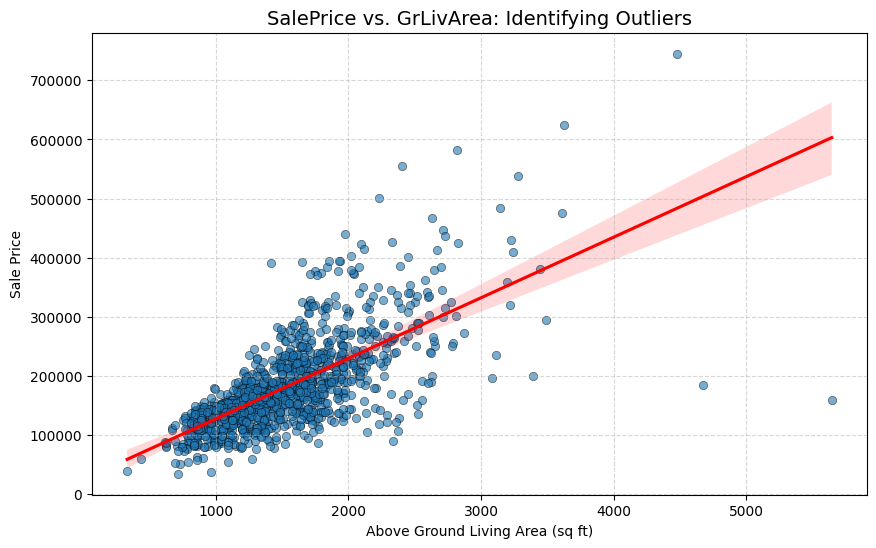

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], alpha=0.6, edgecolor="black")

# Highlighting potential outliers

sns.regplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], scatter=False, color="red")

plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("SalePrice vs. GrLivArea: Identifying Outliers", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
# Identifying the true outliers

df_train[(df_train["GrLivArea"] > 3000) & (df_train["SaleCondition"] == "Partial")]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
798           60       RL        104.0    13518   Pave  None      Reg   
523           60       RL        130.0    40094   Pave  None      IR1   
1298          60       RL        313.0    63887   Pave  None      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
798          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
798        Norm     1Fam     2Story            9            5       2008   
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
798           2009       Hip  CompShg     VinylSd     VinylSd      Stone   
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
798        860.0        Ex        TA      PConc       Ex       TA   
523        762.0        Ex        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
798            No          Unf           0          Unf           0   
523            Gd          GLQ        2260          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
798        1926         1926    GasA        Ex          Y      SBrkr   
523         878         3138    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
798       1966      1174             0       3140             0             0   
523       3138      1538             0       4676             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
798          3         1             4             1          Ex   
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
798             11        Typ           2          Gd    BuiltIn       2009.0   
523             11        Typ           1          Gd    BuiltIn       2007.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
798           Fin           3         820         TA         TA          Y   
523           Fin           3         884         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
798          144           78              0          0            0   
523          208          406              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
798          0   None  None        None        0       7    2009      New   
523          0   None  None        None        0      10    2007      New   
1298       480     Gd  None        None        0       1    2008      New   

     SaleCondition  SalePrice  
798        Partial     485000  
523        Partial     184750  
1298       Partial     16

In [ ]:
# Dropping them from the data

df_train.drop(df_train[(df_train["GrLivArea"] > 3000) & (df_train["SaleCondition"] == "Partial")].index, inplace = True)

### Feature Engineering

* Now, I will create some additional features in order to enhance model performance. I will create some linear combinations of existing features; binary flags indicating the presence/absence of some property characteristics; relevant features based on functional knowledge

In [ ]:
# Creating linear combinations of existing features (total areas, bathrooms, porches)

# ➜ Total square footage including basement and above-ground floors

df_train['TotalSF'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['1stFlrSF'] + df_train['2ndFlrSF'])
df_test['TotalSF'] = (df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] + df_test['1stFlrSF'] + df_test['2ndFlrSF'])

# ➜ Total number of bathrooms, giving half-bathrooms half the weight of full ones

df_train['TotalBathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) + df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_test['TotalBathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) + df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))

# ➜ Total area of all porch-related spaces

df_train['TotalPorchSF'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'])
df_test['TotalPorchSF'] = (df_test['OpenPorchSF'] + df_test['3SsnPorch'] + df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_test['WoodDeckSF'])

# ➜ Sum of the year built and the year remodeled (higher values may indicate better condition)

df_train['YearBlrm'] = (df_train['YearBuilt'] + df_train['YearRemodAdd'])
df_test['YearBlrm'] = (df_test['YearBuilt'] + df_test['YearRemodAdd'])

# Creating some simple binary features

df_train['HasPool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['HasPool'] = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

df_train['Has2ndFloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['Has2ndFloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

df_train['HasGarage'] = df_train['GarageQual'].apply(lambda x: 1 if x != None else 0)
df_test['HasGarage'] = df_test['GarageQual'].apply(lambda x: 1 if x != None else 0)

df_train['HasBsmt'] = df_train['BsmtQual'].apply(lambda x: 1 if x != None else 0)
df_test['HasBsmt'] = df_test['BsmtQual'].apply(lambda x: 1 if x != None else 0)

df_train['HasFireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_test['HasFireplace'] = df_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Creating some additional features that might be relevant

# Age of the house

df_train["HouseAge"] = df_train["YrSold"] - df_train["YearBuilt"]
df_test["HouseAge"] = df_test["YrSold"] - df_test["YearBuilt"]

# Time since last remodel

df_train["YearsSinceRemodel"] = df_train["YrSold"] - df_train["YearRemodAdd"]
df_test["YearsSinceRemodel"] = df_test["YrSold"] - df_test["YearRemodAdd"]

# Overall quality score

df_train["OverallScore"] = df_train["OverallQual"] + df_train["OverallCond"]
df_test["OverallScore"] = df_test["OverallQual"] + df_test["OverallCond"]

### BoxCox Transformation on Skewed Features

--> In regression modeling, many algorithms assume that features and the target variable follow a normal distribution. However, in real-world datasets, especially financial and real estate data, features tend to be skewed.

Applying a Box-Cox transformation to skewed features helps to:

* Improve the Normality Assumption;
* Reduce the Influence of Outliers;
* Improve the Performance of Gradient-Based Models

In [ ]:
# Numerical features that were highly skewed plus the new ones comming from the feature engineering phase

continuous_features += ["TotalSF", "TotalPorchSF", "YearBlrm", "HouseAge", "YearsSinceRemodel"]

# Define threshold for skewness (usually > 0.5 is moderately skewed)

skewed_threshold = 0.5

# Compute skewness only on the training set

skewness = df_train[continuous_features].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)

# Select features that are skewed

skewed_features = skewness[abs(skewness) > skewed_threshold].index.tolist()

print(f"Skewed Features to Transform: {skewed_features}")

Skewed Features to Transform: ['MiscVal', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'MasVnrArea', 'LotFrontage', 'WoodDeckSF', 'TotalPorchSF', 'TotalSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', '1stFlrSF', 'BsmtFinSF1', 'HouseAge', 'YearsSinceRemodel']


In [ ]:
# Dictionary to store Box-Cox lambda values

boxcox_lambdas = {}

# Applying the transformation to the training set

for feature in skewed_features:

  # Box-Cox requires positive values

  if (df_train[feature] > 0).all():
      df_train[feature], boxcox_lambdas[feature] = boxcox(df_train[feature] + 1e-5)  # Adding small constant
  else:
      df_train[feature], boxcox_lambdas[feature] = yeojohnson(df_train[feature])  # Using Yeo-Johnson if necessary

# Applying the same transformation to the test set

for feature in skewed_features:

  # Ensuring positive values

  if (df_test[feature] > 0).all():
      df_test[feature] = boxcox(df_test[feature] + 1e-5, lmbda=boxcox_lambdas[feature])
  else:
      df_test[feature] = yeojohnson(df_test[feature], lmbda=boxcox_lambdas[feature])

### Log Transformation on the Target Feature

* When predicting house prices using regression models, a right-skewed target variable like "SalePrice" can lead to several issues.

* Since many regression models assume a linear relationship between the features and the target, applying a log transformation helps stabilize variance and makes the relationships more interpretable.

* Another key reason for log transformation is that in real estate and financial modeling, percentage changes often matter more than absolute differences.

--> For these reasons, I decided to apply a log transformation on the target variable!

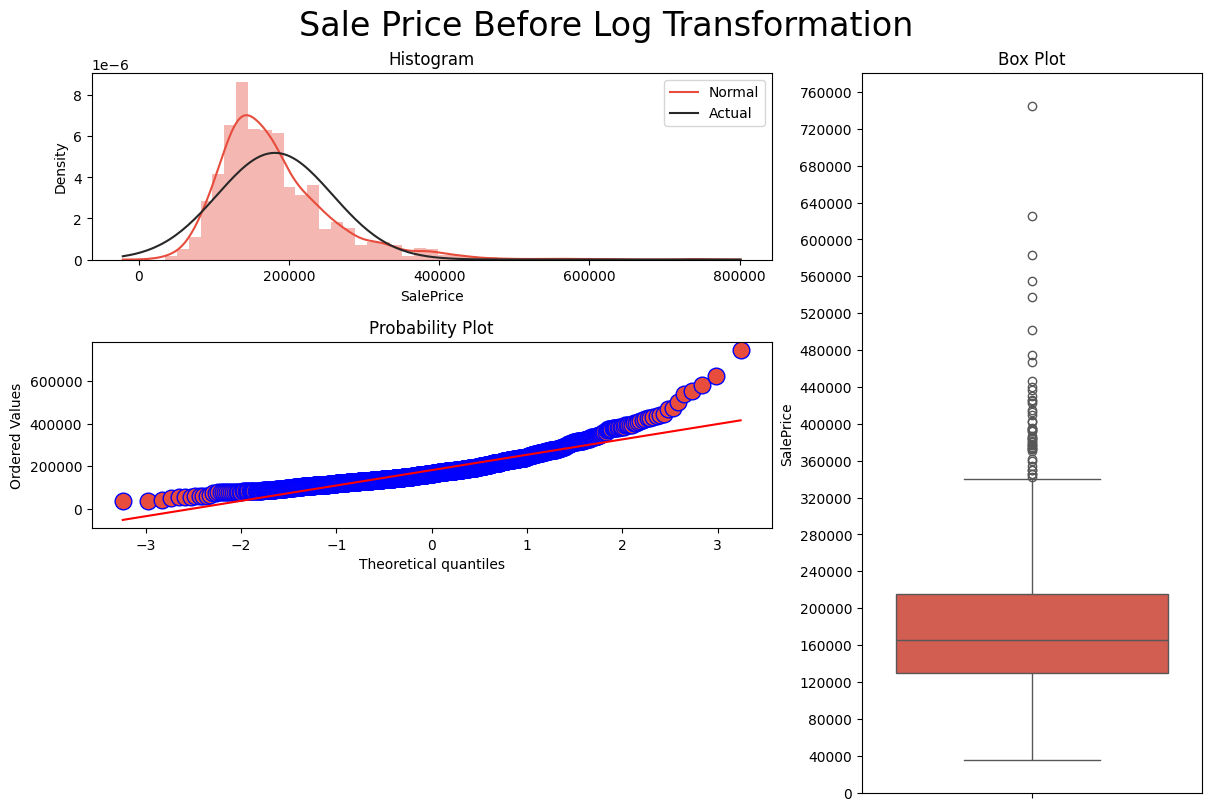

In [ ]:
def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')

    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Probability Plot')

    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')

    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{title}', fontsize=24)

# Checking target variable.

plot_dist3(df_train, 'SalePrice', 'Sale Price Before Log Transformation')

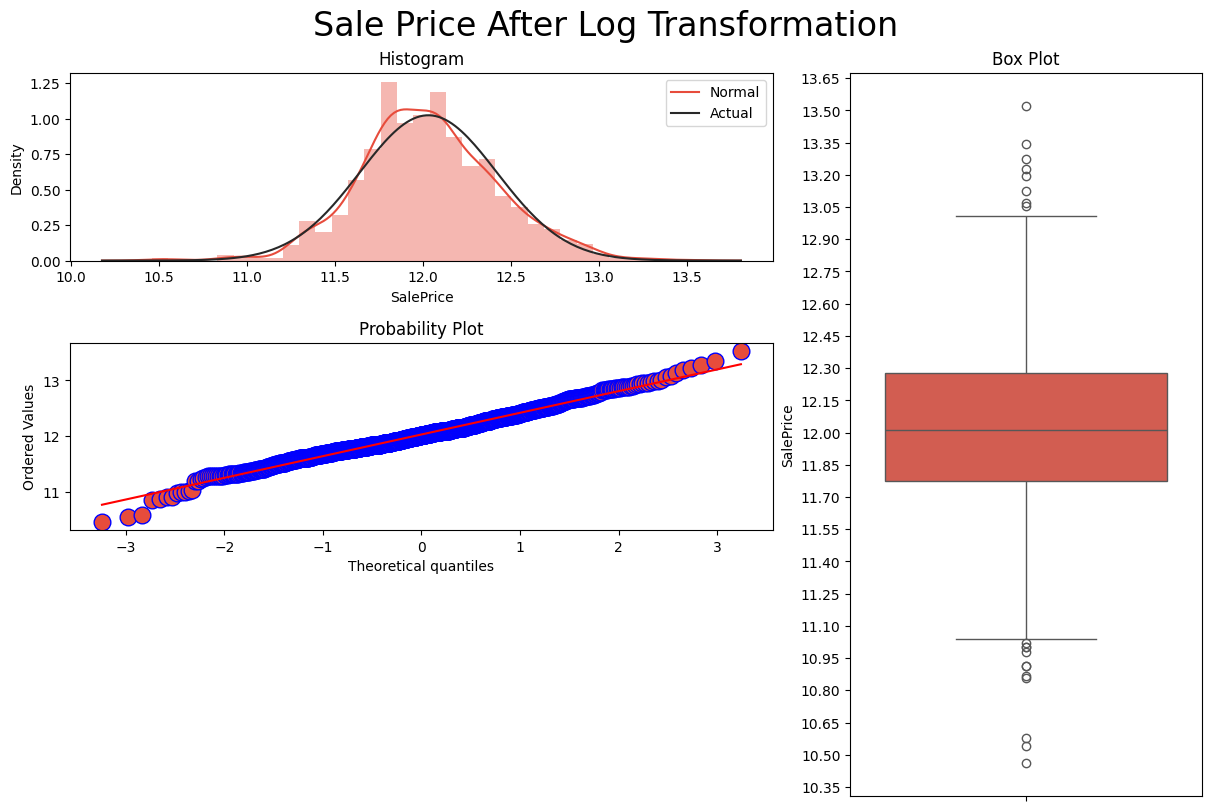

In [ ]:
# Applying log transformation to the target variable

df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
df_test["SalePrice"] = np.log1p(df_test["SalePrice"])

# Checking target variable after Log Transformation

plot_dist3(df_train, 'SalePrice', 'Sale Price After Log Transformation')

### Encoding Categorical Data

In [ ]:
# Converting the following columns to object type --> These ones also need to be one hot encoded

df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

# Storing the numerical features before encoding

numerical_features = [x for x in df_train.select_dtypes("number").columns if x not in  ["HasPool", "Has2ndFloor", "HasGarage", "HasBsmt", "HasFireplace", "SalePrice"]]

In [ ]:
# Encoding the Categorical variables

df_train_encoded = pd.get_dummies(df_train, dtype="int", columns=df_train.select_dtypes("object").columns)
df_test_encoded = pd.get_dummies(df_test, dtype="int", columns=df_test.select_dtypes("object").columns)

# Align the columns of train and test datasets

df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join="outer", axis=1, fill_value=0)

In [ ]:
print("Shape of the training set: ", df_train_encoded.shape)

print("Shape of the test set: ", df_test_encoded.shape)

Shape of the training set:  (1165, 343)
Shape of the test set:  (292, 343)


### Data Normalization (MinMaxScaler)

* In order to ensure that numerical features have a similar scale, a MinMaxScaler normalization technique was employed.

* however, not all models require normalization (Tree-based models) and that's the reason why I decided to create two different data pipelines: One in which numerical data was scaled and another in which it didn't.

In [ ]:
# Scaled Data

X_train = df_train_encoded.drop("SalePrice", axis = 1)
y_train = df_train_encoded["SalePrice"]

X_test= df_test_encoded.drop("SalePrice", axis = 1)
y_test = df_test_encoded["SalePrice"]

# Normal Data

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Defining the MinMaxScaler isntance

scaler = MinMaxScaler()

# Applying MinMaxScaler to the numerical features in the training set

X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])

# Applying MinMaxScaler to the numerical features in the test set

X_test_scaled[numerical_features] = scaler.transform(X_test_scaled[numerical_features])

X_train_scaled.head()

1stFlrSF  2ndFlrSF  3SsnPorch  Alley_Grvl  Alley_None  Alley_Pave  \
254   0.583308  0.000000        0.0           0           1           0   
1066  0.364482  0.916650        0.0           0           1           0   
638   0.362858  0.000000        0.0           0           1           0   
799   0.453761  0.918376        0.0           0           1           0   
380   0.473457  0.903134        0.0           0           0           1   

      BedroomAbvGr  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
254          0.375              1                0                0   
1066         0.375              1                0                0   
638          0.250              1                0                0   
799          0.375              1                0                0   
380          0.375              1                0                0   

      BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  \
254                0                0            0            0   
1066               0                0            0            0   
638                0                0            0            0   
799                0                0            0            0   
380                0                0            0            0   

      BsmtCond_None  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  \
254               0            0            1                0   
1066              0            0            1                0   
638               0            0            1                0   
799               0            0            1                0   
380               0            0            1                0   

      BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_None  \
254                 0                0                1                  0   
1066                0                0                1                  0   
638                 0                0                1                  0   
799                 0                0                1                  0   
380                 0                0                1                  0   

      BsmtFinSF1  BsmtFinSF2  BsmtFinType1_ALQ  BsmtFinType1_BLQ  \
254     0.790242         0.0                 0                 0   
1066    0.000000         0.0                 0                 0   
638     0.000000         0.0                 0                 0   
799     0.684566         0.0                 1                 0   
380     0.507056         0.0                 0                 0   

      BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_None  BsmtFinType1_Rec  \
254                  0                 0                  0                 1   
1066                 0                 0                  0                 0   
638                  0                 0                  0                 0   
799                  0                 0                  0                 0   
380                  0                 1                  0                 0   

      BsmtFinType1_Unf  BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  \
254                  0                 0                 0                 0   
1066                 1                 0                 0                 0   
638                  1                 0                 0                 0   
799                  0                 0                 0                 0   
380                  0                 0                 0                 0   

      BsmtFinType2_LwQ  BsmtFinType2_None  BsmtFinType2_Rec  BsmtFinType2_Unf  \
254                  0                  0                 0                 1   
1066                 0                  0                 0                 1   
638                  0                  0                 0                 1   
799                  0                  0                 0                 1   
380                  0                  0                 0                 1

## Feature Selection

* In order to avoid overfitting and improve generalization, I decided to drop the most highly correlated features from the data, using Pearson Correlation. In this process, if two features are highly correlated, we drop the one that has the most combined correlation with the remaining features!

In [ ]:
def remove_highly_correlated_features(data, threshold=0.9):

    # Computing the correlation matrix

    corr_matrix = data.corr().abs()

    # Creating a set to hold features to remove

    features_to_remove = set()

    # Iterating over the upper triangle of the correlation matrix

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:

                # Extracting the two features

                feature1 = corr_matrix.columns[i]
                feature2 = corr_matrix.columns[j]

                # Calculating the average correlation with all other features

                avg_corr_feature1 = corr_matrix.loc[:, feature1].drop([feature1, feature2]).mean()
                avg_corr_feature2 = corr_matrix.loc[:, feature2].drop([feature1, feature2]).mean()

                # Deciding which feature to keep: keep the one with the lower average correlation

                if avg_corr_feature1 > avg_corr_feature2:
                    features_to_remove.add(feature1)
                else:
                    features_to_remove.add(feature2)

    # Dropping the selected features from the dataset

    data_reduced = data.drop(columns=list(features_to_remove))

    return list(features_to_remove)

In [ ]:
removed_features = remove_highly_correlated_features(X_train[numerical_features], threshold=0.9)

print(f"{len(removed_features)} highly correlated features were identified.")

print("These are the features: ", removed_features)

3 highly correlated features were identified.
These are the features:  ['YearBlrm', 'HouseAge', 'YearRemodAdd']


In [ ]:
# Dropping the previous identifyied features

X_train.drop(columns = removed_features, inplace = True)
X_test.drop(columns = removed_features, inplace = True)

X_train_scaled.drop(columns = removed_features, inplace = True)
X_test_scaled.drop(columns = removed_features, inplace = True)

## Modelling

--> Since we are predicting house pricesm the best metric should focus on minimizing errors in predictions.

* A good metric for this problem is the RMSE!

  1. RMSE penalizes larger errors more than smaller errors, which is crucial in real estate pricing.
  2. It provides results in the same units as SalePrice (making it easy to interpret).

--> Methodology:

* Using a Grid-Search approach, I decided to employ a cross-validation methodology on the training data in order to retrieve the best hyperparameters for each model. Following that, I retrieved the best estimator in order to apply it on the test set and obtain the final error.



In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
def train_and_evaluate(model_name, model, param_grid, train_data, test_data, label_train, label_test):

    print(f"\nTraining {model_name}...")

    # Grid Search with Cross-Validation

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(train_data, label_train)

    # Retrieving the best model from GridSearch

    best_model = grid_search.best_estimator_

    # Evaluating the model on the test set

    y_pred = best_model.predict(test_data)
    rmse = np.sqrt(mean_squared_error(label_test, y_pred))

    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"{model_name} RMSE on Test Set: {rmse:.2f}")

    return best_model

For the models Being used:

* Linear Regression (uses scaled data)
* Support Vector Regression (SVR) (uses scaled data)
* Random Forest Regressor (uses unscaled data)
* XGBoost Regressor (uses unscaled data)

Linear Regression Limitations:

* Oversimplifies house price relationships because it assumes a linear relationship between features and house prices, which is often not the case in real estate markets.
* It it sensitive to outliers because a few extremely high or low house prices can heavily distort predictions.
* Some of the feature interaction is ignored. A house's value depends on interactions, which Linear Regression does not capture well.
* In dynamic real estate markets, price fluctuations are not purely linear, making this model less reliable for varying economic conditions.

Implications for the Management team:
* In dynamic real estate markets, price fluctuations are not purely linear, making this model less reliable for varying economic conditions.

In [ ]:
# Linear Regression

linear_regression_model = train_and_evaluate(
    "Linear Regression",
    LinearRegression(),
    param_grid={},
    train_data=X_train_scaled,
    test_data=X_test_scaled,
    label_train=y_train,
    label_test=y_test
)


Training Linear Regression...
Best Hyperparameters for Linear Regression: {}
Linear Regression RMSE on Test Set: 0.32


Support vector Regression Limitations:

* Takes too long to train and predict when the dataset is large.
* Without careful hyperparameter tuning, it might underfit or overfit the data.
* Unlike tree-based models, it's difficult to explain why a house is predicted at a certain price.

Implications for the Management team:

* Best for small-scale predictions, but not ideal for a real estate agency that requires fast, large-scale pricing estimates.

In [ ]:
# Support Vector Regression

svr_model = train_and_evaluate(
    "Support Vector Regression",
    SVR(),
    param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]},
    train_data=X_train_scaled,
    test_data=X_test_scaled,
    label_train=y_train,
    label_test=y_test
)


Training Support Vector Regression...
Best Hyperparameters for Support Vector Regression: {'C': 1, 'epsilon': 0.01}
Support Vector Regression RMSE on Test Set: 0.14


Random Forest Regressor Limitations:

* Struggles to predict prices outside the range of training data (e.g., a house that is significantly more expensive than any in the training set).
* While training time is reasonable, predicting new house prices can be computationally expensive.
* It's considered a Black-box model. Although it provides feature importance, it doesn't explain exactly how it arrives at a price prediction.
* If not properly tuned, Random Forest memorizes training data rather than generalizing to new properties.

Implications for the Management team:

* Great for mid-range predictions but might struggle with very high-end or unusual properties.

In [ ]:
# Random Forest Regression

random_forest_model = train_and_evaluate(
    "Random Forest Regressor",
    RandomForestRegressor(random_state=42),
    param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    train_data=X_train,
    test_data=X_test,
    label_train=y_train,
    label_test=y_test
)


Training Random Forest Regressor...
Best Hyperparameters for Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}
Random Forest Regressor RMSE on Test Set: 0.14


XGBoost Regressor Limitations:

* Needs careful hyperparameter tuning; otherwise, it might underfit or overfit.
* For large datasets, training can take a long time.
* Like Random Forest, it's difficult to explain individual price predictions.

Implications for the Management team:

* Excellent predictive power, making it the best choice for competitive real estate pricing.


In [ ]:
# XGBoost Regressor

xgboost_model = train_and_evaluate(
    "XGBoost Regressor",
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid={'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]},
    train_data=X_train,
    test_data=X_test,
    label_train=y_train,
    label_test=y_test
)


Training XGBoost Regressor...
Best Hyperparameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost Regressor RMSE on Test Set: 0.13


--> From the final Root Mean Squared Error (RMSE) results:

1. Linear Regression: 0.32 (Worst)
2. Support Vector Regression (SVR): 0.14
3. Random Forest Regressor (RFR): 0.14
4. XGBoost Regressor: 0.13 (Best)

* Since lower RMSE values indicate better predictive performance, XGBoost achieves the lowest error (0.13), making it the best-performing model for this task.

### Most Important Features

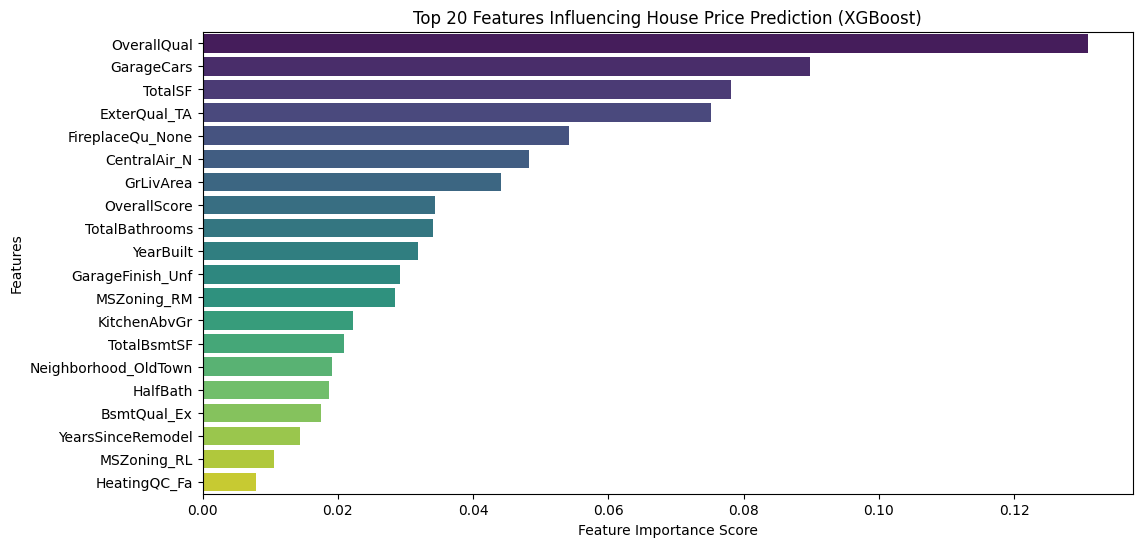

In [ ]:
# Extracting feature importance from the best XGBoost model

feature_importances = xgboost_model.feature_importances_
feature_names = X_train.columns

# Creating the results DataFrame

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Selecting the Top 20 Features

top_n = 20
importance_df_top = importance_df.head(top_n)

# Plotting Top N Feature Importances

plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df_top['Importance'], y=importance_df_top['Feature'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(f"Top {top_n} Features Influencing House Price Prediction (XGBoost)")
plt.show()

### Finding Interested Interactions between Top Features & Discussion

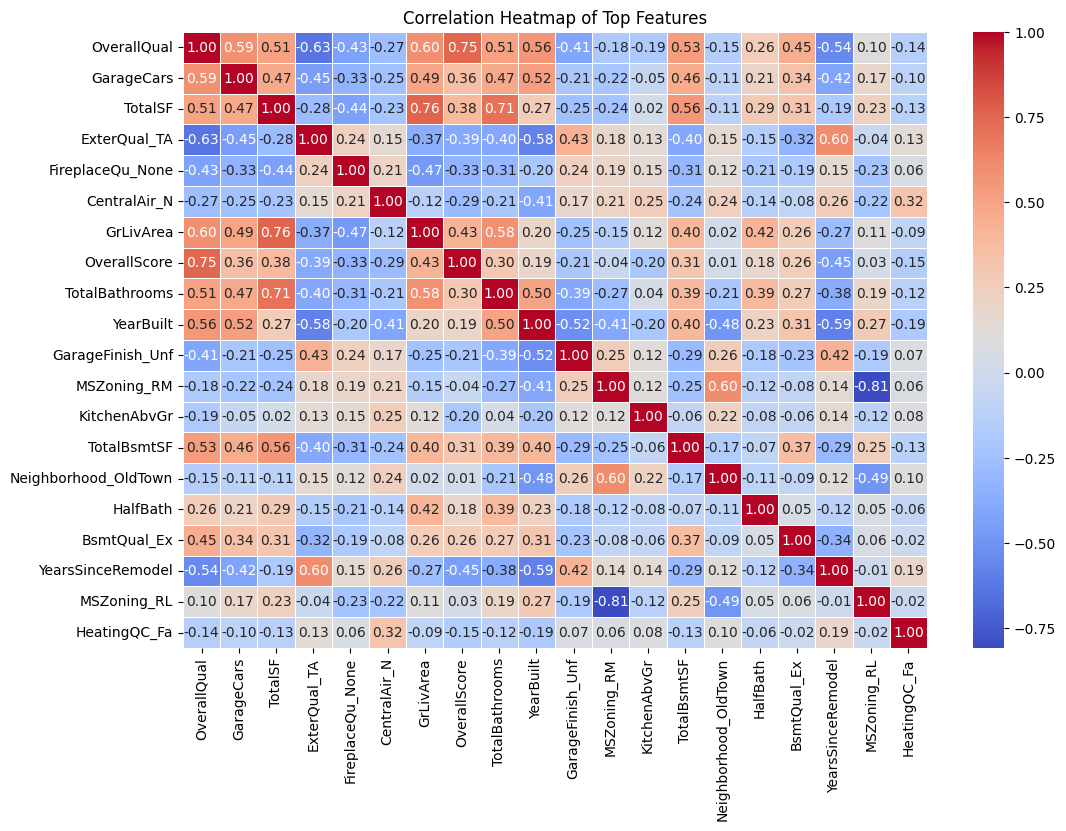

In [ ]:
df_top_features = pd.DataFrame(X_train, columns=[
    "OverallQual", "GarageCars", "TotalSF", "ExterQual_TA", "FireplaceQu_None",
    "CentralAir_N", "GrLivArea", "OverallScore", "TotalBathrooms", "YearBuilt",
    "GarageFinish_Unf", "MSZoning_RM", "KitchenAbvGr", "TotalBsmtSF", "Neighborhood_OldTown",
    "HalfBath", "BsmtQual_Ex", "YearsSinceRemodel", "MSZoning_RL", "HeatingQC_Fa"
])

# Computing the Pearson correlation matrix

corr_matrix = df_top_features.corr()

# Visualizing the correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top Features")
plt.show()

In [ ]:
# Removing duplicate feature interactions by ensuring each pair appears only once

strong_correlations = corr_matrix.abs().unstack().reset_index()
strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Removing self-correlations (Feature with itself)

strong_correlations = strong_correlations[strong_correlations['Feature 1'] != strong_correlations['Feature 2']]

# Sorting by absolute correlation and drop duplicate pairs (keep only one version of each interaction)

strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False)
strong_correlations = strong_correlations.drop_duplicates(subset=['Correlation'], keep='first').head(10)

strong_correlations

Feature 1             Feature 2  Correlation
371     MSZoning_RL           MSZoning_RM     0.808583
46          TotalSF             GrLivArea     0.757198
140    OverallScore           OverallQual     0.750087
162  TotalBathrooms               TotalSF     0.706201
3       OverallQual          ExterQual_TA     0.633192
77     ExterQual_TA     YearsSinceRemodel     0.602247
234     MSZoning_RM  Neighborhood_OldTown     0.600218
6       OverallQual             GrLivArea     0.595135
20       GarageCars           OverallQual     0.586346
197       YearBuilt     YearsSinceRemodel     0.585460

MSZoning_RL vs. MSZoning_RM (0.808)

* The high correlation suggests that houses in Residential Low and Residential Medium  zones often share similar pricing patterns.
* Zoning has a strong influence on property values, as certain zones allow for bigger lot sizes or more dense housing.

TotalSF vs. GrLivArea (0.757)

* Total square footage and above-ground living area  are strongly related since most houses have a significant portion of their space above ground.
* Larger homes tend to have higher market values, making these two crucial predictors.

ExterQual_TA vs. YearsSinceRemodel (0.602)

* A home's exterior quality improves with remodeling, explaining this correlation.
* Recently remodeled homes tend to sell at a premium, especially when the remodel enhances curb appeal.

MSZoning_RM vs. Neighborhood_OldTown (0.600)

* Certain zoning types are common in specific neighborhoods.
* Historical districts or older neighborhoods often have strict zoning laws, impacting property values.

--> Main Takeaways:

* Zoning and neighborhood interactions play a significant role in home pricing.
* Size-related features (TotalSF, GrLivArea) strongly affect house prices.
* Quality metrics (OverallQual, ExterQual_TA) are crucial for valuation.
* Recent remodeling can drive up property values, especially for older homes.

These feature interactions make logical sense based on the real estate market dynamics. The relationships identified align with how properties are valued in real-world housing markets.